In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("books.csv")

ANSWER 1

In [3]:
num_rows, num_cols = data.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

The dataset has 399 rows and 24 columns.


ANSWER 2

In [4]:
no_original_title = data['original_title'].isnull().sum()
print(f"There are {no_original_title} books without an original title.")

There are 36 books without an original title.


ANSWER 3

In [5]:
data_without_null_titles = data.dropna(subset=['original_title'])
unique_books_count = data_without_null_titles['book_id'].nunique()
print(f"There are {unique_books_count} unique books based on 'book_id' after removing null values in the 'original_title' column.")

There are 363 unique books based on 'book_id' after removing null values in the 'original_title' column.


ANSWER 4

In [6]:
average_rating = data['average_rating'].mean()
print(f"The average rating of all the books in the dataset is: {average_rating:.2f}")

The average rating of all the books in the dataset is: 3.98


ANSWER 5

In [7]:
before_2000 = data[data['original_publication_year'] == 2000]
num_books_published_2000 = before_2000.shape[0]
print(f"The number of books published in the year 2000 is: {num_books_published_2000}")

The number of books published in the year 2000 is: 8


ANSWER 6

In [8]:
max_ratings_book = data.loc[data['work_ratings_count'].idxmax()]
max_ratings_title = max_ratings_book['title']
print(f"The book with the maximum number of ratings is: '{max_ratings_title}'")

The book with the maximum number of ratings is: 'The Diary of a Young Girl'


ANSWER 7

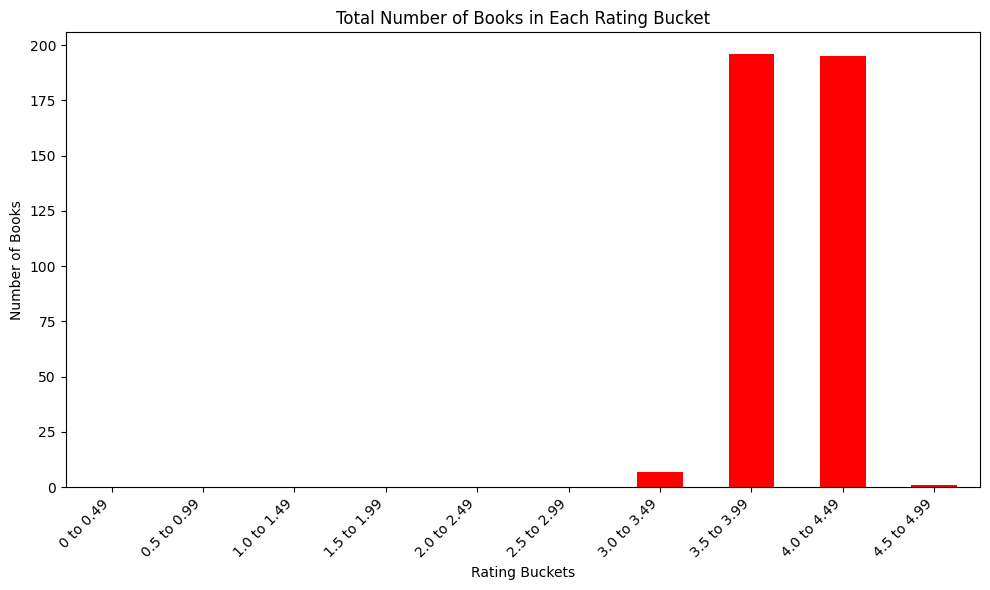

In [9]:
bin_edges = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
bin_labels = [str(edge) + ' to ' + str(edge + 0.49) for edge in bin_edges[:-1]]
data['rating_bucket'] = pd.cut(data['average_rating'], bins=bin_edges, labels=bin_labels, include_lowest=True)
books_in_each_bucket = data['rating_bucket'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
books_in_each_bucket.plot(kind='bar', color='red')
plt.title('Total Number of Books in Each Rating Bucket')
plt.xlabel('Rating Buckets')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()